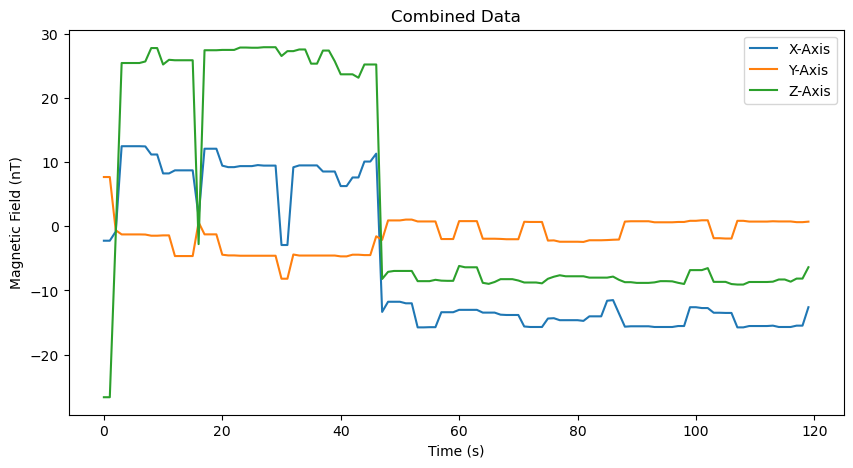

C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning: Q-factor too high for frequencies 0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.02
  warn("Q-factor too high for frequencies %s"%",".join("%.2f"%fi for fi in f[q >= qneeded]))


ValueError: Found array with 0 sample(s) (shape=(0, 12)) while a minimum of 1 is required by HDBSCAN.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import plotly.graph_objects as go
import sys
sys.path.append(r'C:\Users\ASUS\Desktop\ubss\MAGPRIME')
from magprime.algorithms import UBSS

# Function to load data from the .dat file
def load_data(file_path):
    try:
        data = np.loadtxt(file_path, usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))
    except Exception as e:
        print(f"Error loading data: {e}")
        data = np.array([])  # Return an empty array in case of an error
    return data

# Path to the data file
file_path = r"C:\Users\ASUS\Desktop\ubss\Decoded_magnetometer_data1.txt"

# Load data
B = load_data(file_path)
if B.size == 0:
    raise ValueError("Failed to load data or data is empty")

Ba = B.T  # Transpose to separate columns

# Separate into individual arrays for each magnetometer's X, Y, Z components
B_X1, B_Y1, B_Z1 = Ba[0], Ba[1], Ba[2]
B_X2, B_Y2, B_Z2 = Ba[3], Ba[4], Ba[5]
B_X3, B_Y3, B_Z3 = Ba[6], Ba[7], Ba[8]
B_X4, B_Y4, B_Z4 = Ba[9], Ba[10], Ba[11]

# Stack the data into 2D arrays for each magnetometer (3 x n for each)
B1 = np.vstack((B_X1, B_Y1, B_Z1))
B2 = np.vstack((B_X2, B_Y2, B_Z2))
B3 = np.vstack((B_X3, B_Y3, B_Z3))
B4 = np.vstack((B_X4, B_Y4, B_Z4))

# Stack all magnetometer data into a 3D array: (magnetometers, axes, data points)
B_ma = np.stack((B1, B2, B3, B4), axis=0)

# Decimate the data to 0.1 Hz
B_qzs = B_ma[:, :, ::5]

"Plot the data"
plt.figure(figsize=(10, 5))
plt.title("Combined Data")
plt.plot(B_ma[1,0]-B_ma[0,0], label="X-Axis")
plt.plot(B_ma[1,1]-B_ma[0,1], label="Y-Axis")
plt.plot(B_ma[1,2]-B_ma[0,2], label="Z-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (nT)")
plt.legend()
plt.show()

# Detrend the data (proper assignment)
UBSS.detrend = False

# Algorithm Parameters
UBSS.sigma = 10
UBSS.fs = 0.1
UBSS.cs_iters = 2
UBSS.bpo = 5

# Clean the data (use the 3D array)
B_ubss = UBSS.clean(np.copy(B_ma), triaxial=True)

# Check the shape of B_ubss to understand its structure
print(f"B_ubss shape: {B_ubss.shape}")

# Plot the data assuming B_ubss is a 2D array (magnetometer x time)
plt.figure(figsize=(10, 5))
plt.plot(B_ubss[0, :], label="X-Axis (Magnetometer 1)")
plt.plot(B_ubss[1, :], label="Y-Axis (Magnetometer 1)")
plt.plot(B_ubss[2, :], label="Z-Axis (Magnetometer 1)")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (nT)")
plt.legend()
plt.show()



C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning:

Q-factor too high for frequencies 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00



[[ 1.  +0.j    0.03+0.j    0.04+0.j    0.03+0.j    0.05+0.j    0.04+0.j
   0.03+0.j  ]
 [ 1.  +0.j   -0.14-0.3j   0.  +0.3j  -0.16+0.21j -0.24+0.24j  0.13+0.07j
   0.1 +0.06j]
 [ 1.  +0.j    0.26+0.79j  0.04-0.89j -0.39+0.63j -0.35+0.75j -0.91+0.27j
  -0.83-0.43j]
 [ 1.  +0.j   -0.14-0.42j  0.02-0.34j  0.35-0.5j   0.16+0.41j -0.27+0.1j
  -0.29-0.15j]]


100%|███████████████████████████████████████████████████████████████████████████| 11703/11703 [00:38<00:00, 305.88it/s]
C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning:

Q-factor too high for frequencies 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00



[[ 1.  +0.j    0.01+0.j    0.02+0.j    0.01+0.j    0.01+0.j    0.01+0.j
   0.01+0.j    0.01+0.j    0.01+0.j    0.02+0.j    0.02+0.j    0.01+0.j
   0.02+0.j    0.01+0.j    0.03+0.j    0.01+0.j    0.02+0.j  ]
 [ 1.  +0.j   -0.12+0.19j -0.01-0.34j -0.06-0.12j -0.12-0.08j -0.14+0.03j
   0.  -0.27j -0.11+0.03j  0.1 +0.19j  0.29+0.09j -0.24-0.09j -0.15+0.16j
   0.2 +0.07j  0.27+0.14j  0.32+0.15j -0.02+0.22j  0.17+0.23j]
 [ 1.  +0.j    0.09-0.83j -0.08-0.72j -0.75-0.58j  0.34+0.2j  -0.81+0.32j
   0.06+0.83j  0.51+0.1j   0.37+0.83j -0.52-0.15j  0.66+0.3j   0.81+0.44j
  -0.75+0.16j  0.77+0.37j  0.74+0.33j  0.06+0.78j -0.31+0.41j]
 [ 1.  +0.j   -0.03+0.5j  -0.02-0.6j   0.22+0.19j  0.69+0.59j  0.43+0.18j
  -0.04-0.48j  0.8 +0.27j -0.13-0.34j  0.76+0.21j -0.6 -0.22j -0.26+0.19j
  -0.59+0.12j  0.37+0.18j -0.44+0.15j -0.04+0.58j  0.49+0.65j]]


100%|███████████████████████████████████████████████████████████████████████████| 11703/11703 [00:43<00:00, 269.90it/s]
C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning:

Q-factor too high for frequencies 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00



[[ 1.  +0.j    0.05+0.j    0.02+0.j  ]
 [ 1.  +0.j    0.04+0.01j -0.02-0.01j]
 [ 1.  +0.j   -0.35+0.34j -0.49-0.14j]
 [ 1.  +0.j   -0.48+0.72j  0.8 +0.31j]]


100%|███████████████████████████████████████████████████████████████████████████| 11703/11703 [00:35<00:00, 330.97it/s]


B_ubss shape: (3, 11691)


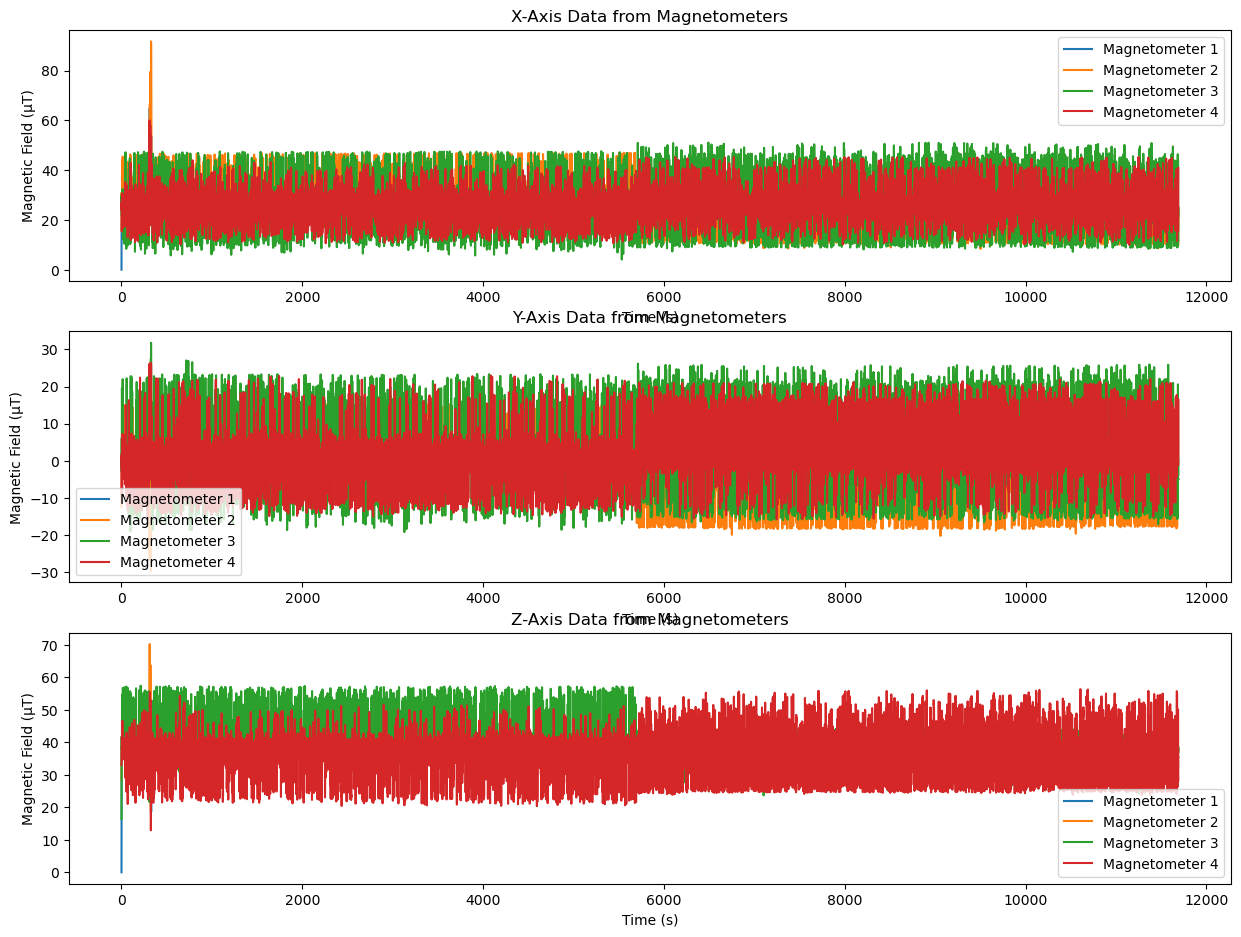

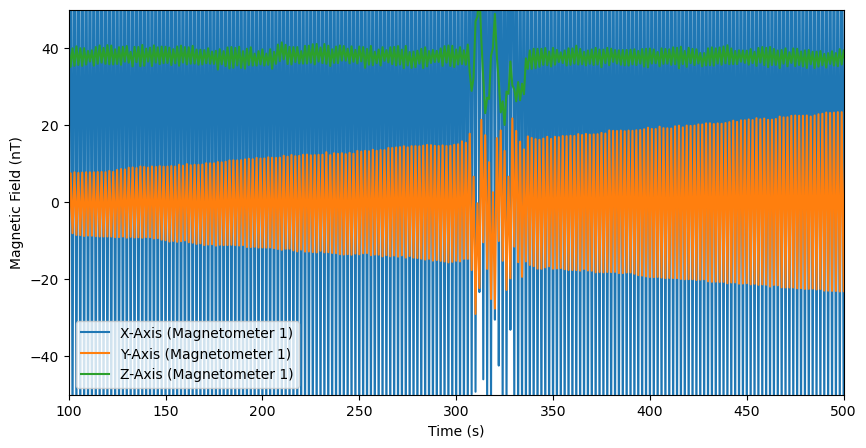

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import plotly.graph_objects as go
import sys
sys.path.append(r'C:\Users\ASUS\Desktop\ubss\MAGPRIME')
from magprime.algorithms import UBSS
from magprime.algorithms import NESS
from magprime.utility import calculate_coupling_coefficients

# Function to load data from the .dat file
def load_data(file_path):
    try:
        # Use np.genfromtxt to handle non-numeric entries
        data = np.genfromtxt(file_path, usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11), 
                             invalid_raise=False, filling_values=0)
    except Exception as e:
        print(f"Error loading data: {e}")
        data = np.array([])  # Return an empty array in case of an error
    return data

# Path to the data file
file_path = r"C:\Users\ASUS\Desktop\ubss\FM_EPDM_BOARD_1.5HRS_DATA_1.7MS1.txt"

# Load data
B = load_data(file_path)
if B.size == 0:
    raise ValueError("Failed to load data or data is empty")

# Check for rows with all zeros (likely due to invalid entries)
if not B.any(axis=1).all():
    print("Warning: Some rows contain only zeros due to invalid entries.")

Ba = B.T  # Transpose to separate columns

# Separate into individual arrays for each magnetometer's X, Y, Z components
B_X1, B_Y1, B_Z1 = Ba[0], Ba[1], Ba[2]
B_X2, B_Y2, B_Z2 = Ba[3], Ba[4], Ba[5]
B_X3, B_Y3, B_Z3 = Ba[6], Ba[7], Ba[8]
B_X4, B_Y4, B_Z4 = Ba[9], Ba[10], Ba[11]

# Stack the data into 2D arrays for each magnetometer (3 x n for each)
B1 = np.vstack((B_X1, B_Y1, B_Z1))
B2 = np.vstack((B_X2, B_Y2, B_Z2))
B3 = np.vstack((B_X3, B_Y3, B_Z3))
B4 = np.vstack((B_X4, B_Y4, B_Z4))

# Stack all magnetometer data into a 3D array: (magnetometers, axes, data points)
B_ma = np.stack((B1, B2, B3, B4), axis=0)

# Decimate the data to 0.1 Hz
B_qzs = B_ma[:, :, ::5]

#
# Plot the data for each axis of the four magnetometers
plt.figure(figsize=(15, 15))

# Plot X-Axis Data from Magnetometers
plt.subplot(4, 1, 1)
plt.title("X-Axis Data from Magnetometers")
plt.plot(B_X1, label="Magnetometer 1")
plt.plot(B_X2, label="Magnetometer 2")
plt.plot(B_X3, label="Magnetometer 3")
plt.plot(B_X4, label="Magnetometer 4")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (µT)")
plt.legend()

# Plot Y-Axis Data from Magnetometers
plt.subplot(4, 1, 2)
plt.title("Y-Axis Data from Magnetometers")
plt.plot(B_Y1, label="Magnetometer 1")
plt.plot(B_Y2, label="Magnetometer 2")
plt.plot(B_Y3, label="Magnetometer 3")
plt.plot(B_Y4, label="Magnetometer 4")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (µT)")
plt.legend()

# Plot Z-Axis Data from Magnetometers
plt.subplot(4, 1, 3)
plt.title("Z-Axis Data from Magnetometers")
plt.plot(B_Z1, label="Magnetometer 1")
plt.plot(B_Z2, label="Magnetometer 2")
plt.plot(B_Z3, label="Magnetometer 3")
plt.plot(B_Z4, label="Magnetometer 4")

plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (µT)")
plt.legend()


# Detrend the data
UBSS.detrend = True

# Algorithm Parameters
UBSS.sigma = 100
UBSS.fs = 10
UBSS.cs_iters = 5
UBSS.bpo = 10

# Clean the data (use the 3D array)
B_ubss = UBSS.clean(np.copy(B_ma), triaxial=True)

# Check the shape of B_ubss to understand its structure
print(f"B_ubss shape: {B_ubss.shape}")

# Plot the cleaned data
plt.figure(figsize=(10, 5))
plt.plot(B_ubss[0, :], label="X-Axis (Magnetometer 1)")
plt.plot(B_ubss[1, :], label="Y-Axis (Magnetometer 1)")
plt.plot(B_ubss[2, :], label="Z-Axis (Magnetometer 1)")

# Add labels
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (nT)")
plt.legend()

# Zoom into a specific range
plt.xlim(100, 500)  # Adjust the x-axis (e.g., between 100 and 500 seconds)
plt.ylim(-50, 50)   # Adjust the y-axis (e.g., between -50 and 50 nT)

plt.show()


# def plot_2d_spectrogram(data, fs, axes_labels):
#     for i, label in enumerate(axes_labels):
#         # Compute the spectrogram
#         f, t, Sxx = signal.spectrogram(data[i], fs=fs, nperseg=256, noverlap=128)
        
#         # Create a 2D heatmap
#         fig = go.Figure(data=go.Heatmap(
#             z=10 * np.log10(Sxx),  # Convert power to dB
#             x=t,  # Time axis
#             y=f,  # Frequency axis
#             colorscale='Viridis'
#         ))
        
#         # Update the layout
#         fig.update_layout(
#             title=f"2D Spectrogram: {label}",
#             xaxis_title="Time (s)",
#             yaxis_title="Frequency (Hz)"
#         )
        
#         # Show the plot
#         fig.show()

# # Call the function with UBSS-cleaned data
# plot_2d_spectrogram(B_ubss, fs=0.1, axes_labels=["X-Axis", "Y-Axis", "Z-Axis"])

# "Algorithm Parameters"
# NESS.aii = calculate_coupling_coefficients(B_qzs, fs = 0.1, sspTol=20)

# "Clean the data"
# B_ness = NESS.clean(np.copy(B_qzs))

# "Plot the data"
# plt.figure(figsize=(10, 5))
# plt.plot(B_ness[0], label="X-Axis")
# plt.plot(B_ness[1], label="Y-Axis")
# plt.plot(B_ness[2], label="Z-Axis")
# plt.xlabel("Time (s)")
# plt.ylabel("Magnetic Field (nT)")
# plt.legend()
